In [ ]:
from google.colab import files
uploaded = files.upload()

Saving dados_torneamento.xlsx to dados_torneamento.xlsx
Saving column_3C.csv to column_3C.csv


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

file_paths = ['/content/column_3C.csv', '/content/dados_torneamento.xlsx']

# Prompt the user to choose a file
print('Please choose a dataset to load:')
for i, file_path in enumerate(file_paths):
    print(f'{i+1}. {file_path}')

selection = int(input()) - 1
selected_file_path = file_paths[selection]

if selection == 0:
  dados = pd.read_csv(selected_file_path, delimiter=',')
elif selection == 1:
  dados = pd.read_excel(selected_file_path)

Please choose a dataset to load:
1. /content/column_3C.csv
2. /content/dados_torneamento.xlsx
2


In [ ]:
dados

,Tempo,af,vc,r,h,Fc,Pc,Ec,PE,classe
0,0.150000,0.561000,74.628000,0.656000,0.477000,521.710000,0.990000,619.530000,2.870000,4
1,0.150000,0.561000,74.629000,0.774000,0.478000,504.900000,0.810000,599.820000,3.540000,3
2,0.150000,0.561000,74.629000,0.716000,0.486000,525.940000,0.910000,624.810000,3.210000,1
3,0.158000,0.532000,74.712000,0.686000,0.448000,528.420000,0.960000,496.770000,3.040000,5
4,0.167000,0.505000,74.465000,0.768000,0.437000,505.060000,0.820000,499.800000,3.500000,2
...,...,...,...,...,...,...,...,...,...,...
295,0.035462,2.487909,73.275178,0.765828,2.097847,535.829776,0.843621,109.209316,3.487689,5
296,0.052346,2.226704,59.136326,0.750930,1.877362,697.047061,0.868450,162.761362,3.403269,5
297,0.090776,2.316488,31.084090,0.692968,1.952832,1345.826192,0.954574,286.823467,3.072555,5
298,0.091866,2.502602,29.294281,0.699570,2.109482,1475.040738,0.942747,289.460377,3.111477,5


**Execute o código abaixo caso escolha o dataset coluna vertebral**

In [ ]:
from sklearn.preprocessing import LabelEncoder

X = dados.iloc[:, :-1].values  # get all columns except the last one as features
y = dados.iloc[:, -1].values  # get the last column as target variable



# Standardizing the features
min_max= MinMaxScaler()
X = min_max.fit_transform(X)

# One-hot encoding the target variable
onehot_encoder = OneHotEncoder(sparse_output=False)
y_onehot = onehot_encoder.fit_transform(y.reshape(-1, 1))

# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.2, random_state=0)

# Setting up the neural network architecture
input_layer_size = X_train.shape[1]
hidden_layer_size = 16  # Choose the number of nodes in the hidden layer >>>> 2 coluna >>>>> 32
output_layer_size = y_onehot.shape[1]  # Set the output layer size to the number of classes

# Initializing the weights and biases
W1 = np.random.randn(input_layer_size, hidden_layer_size)
b1 = np.zeros(hidden_layer_size)
W2 = np.random.randn(hidden_layer_size, output_layer_size)
b2 = np.zeros(output_layer_size)

# Training the neural network using gradient descent
epochs = 100  # Choose the number of epochs to train for
learning_rate = 0.01  # Choose the learning rate for gradient descent

for i in range(epochs):
    # Forward propagation for the training set
    z1_train = np.dot(X_train, W1) + b1
    a1_train = 1 / (1 + np.exp(-z1_train))
    z2_train = np.dot(a1_train, W2) + b2
    y_hat_train = np.exp(z2_train) / np.sum(np.exp(z2_train), axis=1, keepdims=True)

    # Backward propagation for the training set
    dz2_train = y_hat_train - y_train
    dW2_train = np.dot(a1_train.T, dz2_train)
    db2_train = np.sum(dz2_train, axis=0)
    da1_train = np.dot(dz2_train, W2.T) * a1_train * (1 - a1_train)
    dz1_train = da1_train
    dW1_train = np.dot(X_train.T, dz1_train)
    db1_train = np.sum(dz1_train, axis=0)

    # Updating the weights and biases
    W2 -= learning_rate * dW2_train
    b2 -= learning_rate * db2_train
    W1 -= learning_rate * dW1_train
    b1 -= learning_rate * db1_train


# Calculate the cross-entropy loss for the training set
    train_loss = np.mean(-np.sum(y_train * np.log(y_hat_train), axis=1))

# Print the training and test loss after every 1000 epochs
    if i % 10 == 0:
      print(f"Epoch {i}: Train Loss = {train_loss:.4f}")


accuracy_values_train = []
accuracy_values_test = []
cm_train_list = []
cm_test_list = []

# Test the model 50 times
num_tests = 50
for i in range(num_tests):
    # Shuffle the training data
    X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.2)

    z1_test = np.dot(X_test, W1) + b1
    a1_test = 1 / (1 + np.exp(-z1_test))
    z2_test = np.dot(a1_test, W2) + b2
    y_hat_test = np.exp(z2_test) / np.sum(np.exp(z2_test), axis=1, keepdims=True)

    z1_train = np.dot(X_train, W1) + b1
    a1_train = 1 / (1 + np.exp(-z1_train))
    z2_train = np.dot(a1_train, W2) + b2
    y_hat_train = np.exp(z2_train) / np.sum(np.exp(z2_train), axis=1, keepdims=True)

    # Compute the accuracy on the training set using the weights obtained from training
    train_accuracy = np.mean(np.argmax(y_hat_train, axis=1) == np.argmax(y_train, axis=1))
    accuracy_values_train.append(train_accuracy)
    # Compute the accuracy on the test set using the weights obtained from training
    test_accuracy = np.mean(np.argmax(y_hat_test, axis=1) == np.argmax(y_test, axis=1))
    accuracy_values_test.append(test_accuracy)

    cm_train = confusion_matrix(np.argmax(y_train, axis=1), np.argmax(y_hat_train, axis=1))
    cm_train_list.append(cm_train)
    cm_test = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_hat_test, axis=1))
    cm_test_list.append(cm_test)

Epoch 0: Train Loss = 3.0415
Epoch 10: Train Loss = 1.6258
Epoch 20: Train Loss = 1.5529
Epoch 30: Train Loss = 1.5133
Epoch 40: Train Loss = 1.4836
Epoch 50: Train Loss = 1.4590
Epoch 60: Train Loss = 1.4377
Epoch 70: Train Loss = 1.4196
Epoch 80: Train Loss = 1.4111
Epoch 90: Train Loss = 1.4634


**Execute o código abaixo caso escolha o dataset torneamento**



In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier

X = dados.iloc[:, :-1].values  # get all columns except the last one as features
y = dados.iloc[:, -1].values  # get the last column as target variable



# Standardizing the features
min_max = MinMaxScaler()
X = min_max.fit_transform(X)

# One-hot encoding the target variable
onehot_encoder = OneHotEncoder(sparse_output=False)
y_onehot = onehot_encoder.fit_transform(y.reshape(-1, 1))

# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.2, random_state=0)

# Setting up the neural network architecture
input_layer_size = X_train.shape[1]
hidden_layer_size = 100
output_layer_size = y_onehot.shape[1]  # Set the output layer size to the number of classes

# Initializing the weights and biases
W1 = np.random.randn(input_layer_size, hidden_layer_size)
b1 = np.zeros(hidden_layer_size)
W2 = np.random.randn(hidden_layer_size, output_layer_size)
b2 = np.zeros(output_layer_size)

# Training the neural network using gradient descent
epochs = 10000  # Choose the number of epochs to train for
learning_rate = 0.01  # Choose the learning rate for gradient descent

for i in range(epochs):
    # Forward propagation for the training set
    z1_train = np.dot(X_train, W1) + b1
    a1_train = 1 / (1 + np.exp(-z1_train))
    z2_train = np.dot(a1_train, W2) + b2
    y_hat_train = np.exp(z2_train) / np.sum(np.exp(z2_train), axis=1, keepdims=True)

    # Backward propagation for the training set
    dz2_train = y_hat_train - y_train
    dW2_train = np.dot(a1_train.T, dz2_train)
    db2_train = np.sum(dz2_train, axis=0)
    da1_train = np.dot(dz2_train, W2.T) * a1_train * (1 - a1_train)
    dz1_train = da1_train
    dW1_train = np.dot(X_train.T, dz1_train)
    db1_train = np.sum(dz1_train, axis=0)

    # Updating the weights and biases
    W2 -= learning_rate * dW2_train
    b2 -= learning_rate * db2_train
    W1 -= learning_rate * dW1_train
    b1 -= learning_rate * db1_train


# Calculate the cross-entropy loss for the training set
    train_loss = np.mean(-np.sum(y_train * np.log(y_hat_train), axis=1))

# Print the training and test loss after every 1000 epochs
    if i % 100 == 0:
      print(f"Epoch {i}: Train Loss = {train_loss:.4f}")


accuracy_values_train = []
accuracy_values_test = []
cm_train_list = []
cm_test_list = []

# Test the model 50 times
num_tests = 50
for i in range(num_tests):
    # Shuffle the training data
    X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.2)

    z1_test = np.dot(X_test, W1) + b1
    a1_test = 1 / (1 + np.exp(-z1_test))
    z2_test = np.dot(a1_test, W2) + b2
    y_hat_test = np.exp(z2_test) / np.sum(np.exp(z2_test), axis=1, keepdims=True)



    z1_train = np.dot(X_train, W1) + b1
    a1_train = 1 / (1 + np.exp(-z1_train))
    z2_train = np.dot(a1_train, W2) + b2
    y_hat_train = np.exp(z2_train) / np.sum(np.exp(z2_train), axis=1, keepdims=True)

    # Compute the accuracy on the training set using the weights obtained from training
    train_accuracy = np.mean(np.argmax(y_hat_train, axis=1) == np.argmax(y_train, axis=1))
    accuracy_values_train.append(train_accuracy)
    # Compute the accuracy on the test set using the weights obtained from training
    test_accuracy = np.mean(np.argmax(y_hat_test, axis=1) == np.argmax(y_test, axis=1))
    accuracy_values_test.append(test_accuracy)

    cm_train = confusion_matrix(np.argmax(y_train, axis=1), np.argmax(y_hat_train, axis=1))
    cm_train_list.append(cm_train)
    cm_test = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_hat_test, axis=1))
    cm_test_list.append(cm_test)

Epoch 0: Train Loss = 6.3162
Epoch 100: Train Loss = 1.3808
Epoch 200: Train Loss = 1.2714
Epoch 300: Train Loss = 1.1613
Epoch 400: Train Loss = 1.2051
Epoch 500: Train Loss = 0.9993
Epoch 600: Train Loss = 0.9676
Epoch 700: Train Loss = 0.8964
Epoch 800: Train Loss = 0.8442
Epoch 900: Train Loss = 0.8044
Epoch 1000: Train Loss = 0.7776
Epoch 1100: Train Loss = 0.7658
Epoch 1200: Train Loss = 0.8366
Epoch 1300: Train Loss = 0.6862
Epoch 1400: Train Loss = 0.6384
Epoch 1500: Train Loss = 0.7638
Epoch 1600: Train Loss = 0.5266
Epoch 1700: Train Loss = 0.5841
Epoch 1800: Train Loss = 0.5920
Epoch 1900: Train Loss = 0.4791
Epoch 2000: Train Loss = 0.5451
Epoch 2100: Train Loss = 0.4898
Epoch 2200: Train Loss = 0.4702
Epoch 2300: Train Loss = 0.4588
Epoch 2400: Train Loss = 0.6617
Epoch 2500: Train Loss = 0.3759
Epoch 2600: Train Loss = 0.6237
Epoch 2700: Train Loss = 0.3921
Epoch 2800: Train Loss = 0.3515
Epoch 2900: Train Loss = 0.3428
Epoch 3000: Train Loss = 0.4638
Epoch 3100: Train Lo

In [ ]:
y_pred_test = np.argmax(y_hat_test, axis=1)

    # Calculate the actual labels
y_actual_test = np.argmax(y_test, axis=1)

for j in range(len(y_pred_test)):
    output_label = (np.array([y_pred_test[j]]))[0]
    actual_label = (np.array([y_actual_test[j]]))[0]
    print(f"Sample {j+1}: Predicted Label = {output_label}, Actual Label = {actual_label}")

Sample 1: Predicted Label = 1, Actual Label = 1
Sample 2: Predicted Label = 1, Actual Label = 1
Sample 3: Predicted Label = 3, Actual Label = 3
Sample 4: Predicted Label = 2, Actual Label = 2
Sample 5: Predicted Label = 3, Actual Label = 3
Sample 6: Predicted Label = 2, Actual Label = 2
Sample 7: Predicted Label = 0, Actual Label = 0
Sample 8: Predicted Label = 4, Actual Label = 4
Sample 9: Predicted Label = 4, Actual Label = 4
Sample 10: Predicted Label = 3, Actual Label = 3
Sample 11: Predicted Label = 0, Actual Label = 0
Sample 12: Predicted Label = 0, Actual Label = 0
Sample 13: Predicted Label = 3, Actual Label = 3
Sample 14: Predicted Label = 3, Actual Label = 3
Sample 15: Predicted Label = 4, Actual Label = 4
Sample 16: Predicted Label = 4, Actual Label = 4
Sample 17: Predicted Label = 2, Actual Label = 2
Sample 18: Predicted Label = 2, Actual Label = 2
Sample 19: Predicted Label = 1, Actual Label = 1
Sample 20: Predicted Label = 3, Actual Label = 3
Sample 21: Predicted Label = 

**Avaliar resultados de accuracia**

In [ ]:
accuracy_mean_train = np.mean(accuracy_values_train)
accuracy_mean_test = np.mean(accuracy_values_test)
accuracy_std_train = np.std(accuracy_values_train)
accuracy_std_test = np.std(accuracy_values_test)


df_results = pd.DataFrame({
      'Accuracy Mean': [accuracy_mean_train, accuracy_mean_test],
      'Accuracy Std': [accuracy_std_train, accuracy_std_test]
}, index=['Train', 'Test'])

df_results

,Accuracy Mean,Accuracy Std
Train,0.936750,0.006384
Test,0.936333,0.025536


In [ ]:
cm_train_sum = np.sum(cm_train_list, axis=0)
cm_test_sum = np.sum(cm_test_list, axis=0)

**Matriz de confusão coluna vertebral**

In [ ]:
target_names = ['Normal', 'Hernia', 'Spondilolysthesis']


fig, ax = plt.subplots(1, 2, figsize=(12, 6))

  # Plot train confusion matrix
im = ax[0].imshow(cm_train_sum, cmap='Oranges')
ax[0].set_xticks(np.arange(len(target_names)))
ax[0].set_yticks(np.arange(len(target_names)))
ax[0].set_xticklabels(target_names)
ax[0].set_yticklabels(target_names)
plt.setp(ax[0].get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
for i in range(len(target_names)):
    for j in range(len(target_names)):
        text = ax[0].text(j, i, cm_train_sum[i, j], ha="center", va="center", color="black")
ax[0].set_title("Confusion Matrix TRAIN Coluna Vertebral")

  # Plot test confusion matrix
im = ax[1].imshow(cm_test_sum, cmap='Oranges')
ax[1].set_xticks(np.arange(len(target_names)))
ax[1].set_yticks(np.arange(len(target_names)))
ax[1].set_xticklabels(target_names)
ax[1].set_yticklabels(target_names)
plt.setp(ax[1].get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
for i in range(len(target_names)):
    for j in range(len(target_names)):
        text = ax[1].text(j, i, cm_test_sum[i, j], ha="center", va="center", color="black")
ax[1].set_title("Confusion Matrix TEST Coluna Vertebral")

  # Add a colorbar for the two subplots

fig.tight_layout()
plt.show()

**Matriz de confusão torneamento**




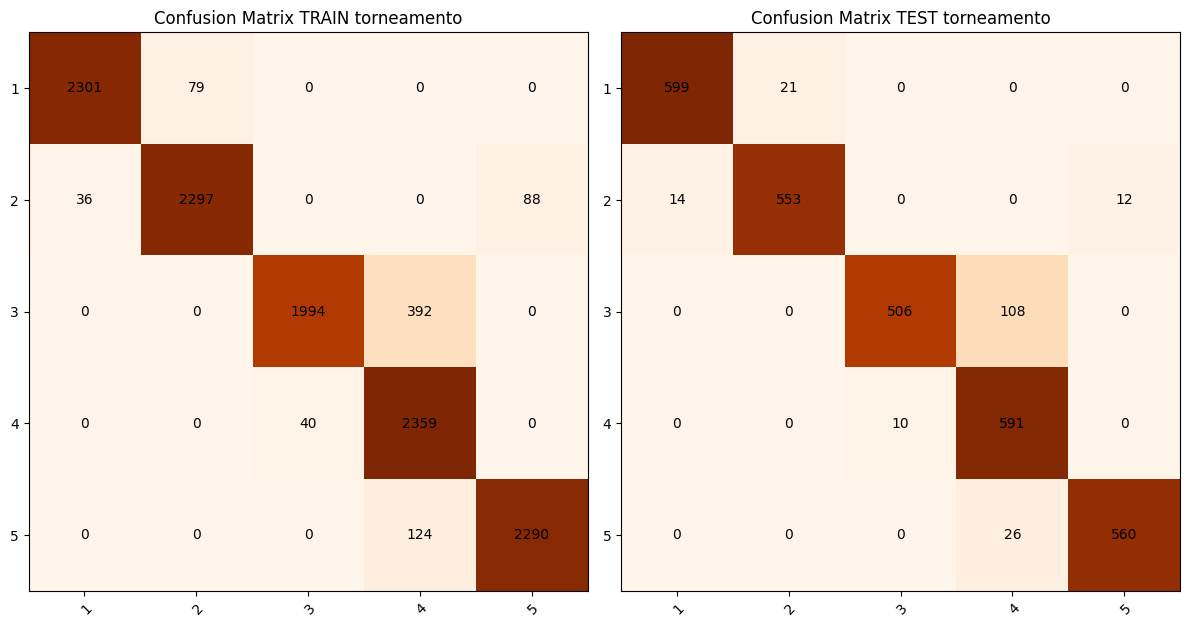

In [ ]:
target_names = ['1','2','3','4','5']


fig, ax = plt.subplots(1, 2, figsize=(12, 6))

  # Plot train confusion matrix
im = ax[0].imshow(cm_train_sum, cmap='Oranges')
ax[0].set_xticks(np.arange(len(target_names)))
ax[0].set_yticks(np.arange(len(target_names)))
ax[0].set_xticklabels(target_names)
ax[0].set_yticklabels(target_names)
plt.setp(ax[0].get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
for i in range(len(target_names)):
    for j in range(len(target_names)):
        text = ax[0].text(j, i, cm_train_sum[i, j], ha="center", va="center", color="black")
ax[0].set_title("Confusion Matrix TRAIN torneamento")

  # Plot test confusion matrix
im = ax[1].imshow(cm_test_sum, cmap='Oranges')
ax[1].set_xticks(np.arange(len(target_names)))
ax[1].set_yticks(np.arange(len(target_names)))
ax[1].set_xticklabels(target_names)
ax[1].set_yticklabels(target_names)
plt.setp(ax[1].get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
for i in range(len(target_names)):
    for j in range(len(target_names)):
        text = ax[1].text(j, i, cm_test_sum[i, j], ha="center", va="center", color="black")
ax[1].set_title("Confusion Matrix TEST torneamento")

  # Add a colorbar for the two subplots

fig.tight_layout()
plt.show()